<a href="https://colab.research.google.com/github/DanyelMorales/MinesRocks/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -o "sonar.all-data" "https://raw.githubusercontent.com/DanyelMorales/MinesRocks/main/dataset/sonar.all-data"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87776  100 87776    0     0   323k      0 --:--:-- --:--:-- --:--:--  323k


In [2]:
!curl -o "sonar.mines" "https://raw.githubusercontent.com/DanyelMorales/MinesRocks/main/dataset/sonar.mines"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49217  100 49217    0     0   190k      0 --:--:-- --:--:-- --:--:--  190k


In [3]:
!curl -o "sonar.names" "https://raw.githubusercontent.com/DanyelMorales/MinesRocks/main/dataset/sonar.names"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5872  100  5872    0     0  27649      0 --:--:-- --:--:-- --:--:-- 27568


In [4]:
!curl -o "sonar.rocks" "https://raw.githubusercontent.com/DanyelMorales/MinesRocks/main/dataset/sonar.rocks"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43052  100 43052    0     0   122k      0 --:--:-- --:--:-- --:--:--  122k


In [5]:
!curl -o "mnist.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/mnist.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1802  100  1802    0     0  20152      0 --:--:-- --:--:-- --:--:-- 20247


In [6]:
!curl -o "digit_classifier.py" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/lib/digit_classifier.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1481  100  1481    0     0  11313      0 --:--:-- --:--:-- --:--:-- 11480


In [7]:
import pandas as pd
import numpy as np

data_df = pd.read_csv("sonar.all-data", header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
data_np = data_df.to_numpy()
np.random.shuffle(data_np)
data_np.shape

(208, 61)

In [9]:
data_np

array([[0.0119, 0.0582, 0.0623, ..., 0.003, 0.0138, 'R'],
       [0.0408, 0.0653, 0.0397, ..., 0.007, 0.0055, 'R'],
       [0.1021, 0.083, 0.0577, ..., 0.0227, 0.0106, 'M'],
       ...,
       [0.0152, 0.0102, 0.0113, ..., 0.0034, 0.0033, 'R'],
       [0.0123, 0.0022, 0.0196, ..., 0.0047, 0.0071, 'R'],
       [0.0374, 0.0586, 0.0628, ..., 0.0098, 0.0126, 'M']], dtype=object)

In [10]:
from mnist import prepend_bias, load_images, load_labels,one_hot_encode,extract_test_data
import digit_classifier

In [11]:
X_train, Y_train, X_test, Y_test = extract_test_data(data_np)

test_size: 48
[[0.0119 0.0582 0.0623 ... 0.003 0.0138 'R']
 [0.0408 0.0653 0.0397 ... 0.007 0.0055 'R']
 [0.1021 0.083 0.0577 ... 0.0227 0.0106 'M']
 ...
 [0.0307 0.0523 0.0653 ... 0.0124 0.0055 'M']
 [0.115 0.1163 0.0866 ... 0.0068 0.0086 'M']
 [0.0223 0.0375 0.0484 ... 0.0059 0.0022 'R']]


In [12]:
Y_train = one_hot_encode(Y_train, True,2)
X_train = prepend_bias(X_train)
X_test = prepend_bias(X_test)

{'M': 1, 'R': 0}


In [26]:
Y_train = Y_train.astype(np.float64)
X_train = X_train.astype(np.float64)
X_test  = X_test.astype(np.float64)

In [19]:
Y_train.dtype

dtype('float64')

In [20]:
X_train.dtype

dtype('O')

In [21]:
X_test.dtype

dtype('O')

In [18]:
Y_test.dtype

dtype('O')

In [17]:
w = digit_classifier.train(X_train,Y_train,X_test,Y_test, iterations=200, lr=1e-5)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [ ]:
digit_classifier.test(X_test, Y_test, w)

Success: 9032/10000 90.32%


In [ ]:
! curl -o "image_tester.png" "https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/7.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8377  100  8377    0     0  27498      0 --:--:-- --:--:-- --:--:-- 27555


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_image(file):
  test_image = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
  img_resized = cv2.resize(test_image, (28, 28))
  img_resized = cv2.bitwise_not(img_resized)
  plt.imshow(img_resized, cmap="Greys")
  return img_resized

In [ ]:
# prompt: cv2 image to np buffer

def cv2_to_np_buffer(img):
  np_img = np.asarray(img)
  np_img = np.expand_dims(np_img, axis=0)
  print(np_img.shape)
  return np_img

def prepare_image(img):
  img = cv2_to_np_buffer(load_image(img))
  img= img.reshape(1,28*28)
  img = prepend_bias(img)
  print(f"w shape: {w.shape}")
  print(f"img shape: {img.shape}")
  return img


(1, 28, 28)
w shape: (785, 10)
img shape: (1, 785)


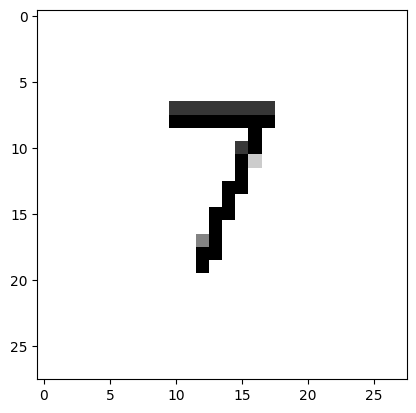

In [ ]:
tester = prepare_image("image_tester.png")

In [ ]:
digit_classifier.classify(tester,w)

array([[1]])

In [ ]:
import pandas as pd
pd.DataFrame(w)

,0,1,2,3,4,5,6,7,8,9
0,-0.000014,-2.362471e-06,-1.702364e-05,-2.010009e-05,-9.915624e-06,-5.944340e-06,-1.295700e-05,-0.000006,-4.355776e-05,-2.180818e-05
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
3,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
4,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
780,-0.000003,-4.612743e-08,-1.371935e-07,-1.187978e-07,-8.519923e-07,-1.664934e-07,-1.588954e-07,0.000002,-2.824660e-07,-4.181571e-07
781,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
782,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
783,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
